In [2]:
# train = pd.read_csv('Training LUNG Cancer Dataset.csv', low_memory=True)
# melanoma = pd.read_csv('Melanoma Validation Dataset.csv', low_memory=True)
# lancent = pd.read_csv('Lancent_dataset_complete.txt', low_memory=True)
extra_lung = pd.read_csv

In [2099]:
cpg_sites = train.drop(['geo_accession', 'Labels'], axis=1)
labels = train['Labels']

# Functions for filling empty values 
def fill_missing_with_mean(row):
    return row.fillna(row.mean())

# Dataset conversion for validation
lancent_test_standarized = scaler.fit_transform(lancent[rf_cpgs].fillna(0))
lancent_y = lancent['Labels']
melanoma_test_standarized = scaler.fit_transform(melanoma[rf_cpgs].fillna(0))
melanoma_y = melanoma['Labels']

# Functions for calling matrices 
def print_metrics(x, y):
    print("Accuracy:", accuracy_score(x, y))
    print("\nConfusion Matrix:\n", confusion_matrix(x, y))
    print("\nClassification Report:\n", classification_report(x, y))

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier , HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC

## CV and ENET

In [6]:
# Preparing Training Dataset for analysis 
cpg_sites = train.drop(['geo_accession', 'Labels'], axis=1)
labels = train['Labels']
# Co Effeceint of Variation
var = stats.variation(cpg_sites,axis=0)
index1 = np.where(var > 1)
np.save("CV" + ".npy", index1[0])
res_list = [cpg_sites.columns[i] for i in index1[0].tolist()]
# Elastic Net
elanet_train = cpg_sites[res_list]
enetCV = ElasticNetCV(alphas=[0.0001], l1_ratio=[.1], max_iter=10000).fit(elanet_train, labels)
mask = enetCV.coef_ != 0
index2 = np.where(mask == True)
Enet_CV_CPGs = [cpg_sites.columns[i] for i in index2[0].tolist()]
# Splitting based on CPG sites
X = cpg_sites[Enet_CV_CPGs]
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [ ]:
Model = "SGD Classifier"
Feature = "CV + ENET"
def print_metrics(x, y):
    print(f" --------  {Model} {Feature} Accuracy:", accuracy_score(x, y))
    print(f"\n{Model} {Feature} Confusion Matrix:\n", confusion_matrix(x, y))
    print(f"\n{Model} {Feature} Classification Report:\n", classification_report(x, y))


# # Linear Regression 
# linear_model = LinearRegression()
# linear_model.fit(X_train_standardized, y_train)
# y_pred = linear_model.predict(X_test_standardized)
# classification_report(y_pred, y_test)
# # Output of LINEAR REGRESSION :: Can not map binary values with floats


#                                                             
#                               -------------------------------- LOGISTIC REGRESSION ANALYSIS

# model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                             
#                                             ------------------ Random Forest Analysis 

# model = RandomForestClassifier(n_estimators = 100, random_state = 220)
# model = RandomForestClassifier(n_estimators=150 ,max_features= 5 , random_state=20)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                             
#                                         -------------------------- SGC Classifier

# model = SGDClassifier(max_iter=500, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)


#                                                             
#                                                --------------------- SVM Classifier 

# model = LinearSVC(dual="auto", random_state=0, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                               ------------------------- Gradient Boost

# params = {'n_estimators':2, 'max_depth':1, 'learning_rate': 0.4}
# model = GradientBoostingClassifier(**params)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                               ------------------- HistGradientBoostingClassifier

# model = HistGradientBoostingClassifier(min_samples_leaf= 1 ,max_depth=2, learning_rate=0.5,max_iter=200)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)



# # model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
# model.fit(X_train_standardized,y_train)
# print("Test :", model.score(X_test_standardized,y_test))
# print("Lancent :", model.score(lancent_test_standarized,lancent_y))
# print("Melanoma :", model.score(melanoma_test_standarized,melanoma_y))

In [ ]:
# import tensorflow as tf
# from keras.callbacks import ModelCheckpoint
# from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
NN_model = Sequential()
NN_model = Sequential()
# Input layer
NN_model.add(Dense(64, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.7))
# Hidden layers
# NN_model.add(Dense(128, kernel_initializer='normal', activation='relu'))

# NN_model.add(Dropout(0.4))
NN_model.add(Dense(128, kernel_initializer='normal', activation='relu'))
# Output layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile NN
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mean_absolute_error', 'accuracy'])
NN_model.summary()
history = NN_model.fit(X_train_standardized,y_train, verbose=0, batch_size=128, epochs=20)
# pd.DataFrame(history.history).tail()
print("Test :" ,NN_model.evaluate(X_test_standardized,y_test))
print("Lancent :", NN_model.evaluate(lancent_test_standarized,lancent_y))
print('Melanome :', NN_model.evaluate(melanoma_test_standarized,melanoma_y))

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 64)                21952     
                                                                 
 dropout_35 (Dropout)        (None, 64)                0         
                                                                 
 dense_90 (Dense)            (None, 128)               8320      
                                                                 
 dense_91 (Dense)            (None, 1)                 129       
                                                                 
Total params: 30401 (118.75 KB)
Trainable params: 30401 (118.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Random Forest feature selection

In [8]:
X = cpg_sites
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)
model.fit(X_train_standardized, y_train)
model.score(X_test_standardized,y_test)
feature_importances = pd.Series(model.feature_importances_, index=cpg_sites.columns)
rf_cpgs = feature_importances[feature_importances > 0].index.to_list()

In [9]:
X = cpg_sites[rf_cpgs]
y = labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

In [16]:
Model = type(model).__name__
Feature = "Random Forest"
def print_metrics(x, y):
    print(f" --------  {Model} {Feature} Accuracy:", accuracy_score(x, y))
    print(f"\n{Model} {Feature} Confusion Matrix:\n", confusion_matrix(x, y))
    print(f"\n{Model} {Feature} Classification Report:\n", classification_report(x, y))


# # Linear Regression 
# linear_model = LinearRegression()
# linear_model.fit(X_train_standardized, y_train)
# y_pred = linear_model.predict(X_test_standardized)
# classification_report(y_pred, y_test)
# # Output of LINEAR REGRESSION :: Can not map binary values with floats


#                                                             
#                               -------------------------------- LOGISTIC REGRESSION ANALYSIS

# model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.5)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                             
#                                             ------------------ Random Forest Analysis 

# model = RandomForestClassifier(n_estimators = 100, random_state = 220)
# model = RandomForestClassifier(n_estimators=150 ,max_features= 5 , random_state=20)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                             
#                                         -------------------------- SGC Classifier

# model = SGDClassifier(max_iter=500, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)


#                                                             
#                                                --------------------- SVM Classifier 

# model = LinearSVC(dual="auto", random_state=0, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                               ------------------------- Gradient Boost

# params = {'n_estimators':2, 'max_depth':1, 'learning_rate': 0.4}
# model = GradientBoostingClassifier(**params)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                               ------------------- HistGradientBoostingClassifier

# model = HistGradientBoostingClassifier(min_samples_leaf= 1 ,max_depth=2, learning_rate=0.5,max_iter=200)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)




In [13]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
NN_model = Sequential()
NN_model = Sequential()
# Input layer
NN_model.add(Dense(32, kernel_initializer='normal', input_dim=X_train.shape[1], activation='sigmoid'))
NN_model.add(Dropout(0.8))
# Hidden layers
NN_model.add(Dense(8, kernel_initializer='normal', activation='relu'))

# NN_model.add(Dropout(0.8))
# NN_model.add(Dense(32, kernel_initializer='normal', activation='relu'))
# Output layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile NN
NN_model.compile(loss='binary_crossentropy', optimizer='ADAM', metrics=['mean_absolute_error', 'accuracy'])
# NN_model.summary()

history = NN_model.fit(X_train_standardized,y_train, verbose=0, batch_size=128, epochs=20)
# pd.DataFrame(history.history).tail()
print("Test :" ,NN_model.evaluate(X_test_standardized,y_test))
print("Lancent :", NN_model.evaluate(lancent_test_standarized,lancent_y))
print('Melanome :', NN_model.evaluate(melanoma_test_standarized,melanoma_y))

## ANOVA Feature Selection

In [136]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel

In [137]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier())

In [144]:
rf_sel_features=sel.get_support()

In [149]:
X_rf = np.delete(X, obj=~np.array(rf_sel_features), axis=1)
pd.DataFrame(X_rf)

,0,1,2,3,4,5,6,7,8,9,...,359,360,361,362,363,364,365,366,367,368
0,1.468345,0.961877,0.873144,-0.514321,2.064817,-0.145675,0.217696,0.263477,0.331939,-1.403186,...,1.044953,0.388860,-2.154744,1.166922,1.131037,-0.890519,1.529835,-1.232949,0.090685,0.055691
1,2.066252,-0.186795,0.523093,-0.790456,1.589893,1.291559,0.269308,-0.500778,1.338485,-1.085779,...,0.736773,-0.319725,-1.236041,-1.023107,1.600488,0.044756,-0.760092,-0.238756,-0.299987,0.111686
2,-0.046127,-0.320153,0.620740,0.420340,1.542819,0.682589,-0.731935,2.107823,0.191274,0.902899,...,0.536238,-0.097872,0.645706,-0.497251,-0.300688,-2.007196,0.283148,-0.248308,-0.229540,-0.453543
3,-1.438166,-0.187506,0.272884,3.202991,-0.340843,-0.824004,0.361599,0.946656,0.994114,-1.435395,...,0.994723,-0.793743,0.624307,2.695938,0.683187,-0.927865,0.805871,-1.548329,-0.953638,0.863869
4,-0.309239,-1.041539,0.008472,-0.633602,-0.009333,0.702489,-0.993393,-0.349358,0.498109,-0.313008,...,0.480801,-0.317197,-0.651273,0.673200,0.189521,-0.826415,0.103036,0.392769,-0.268875,0.310314
5,0.203557,-0.107976,-1.225613,-0.282706,-0.369113,0.371529,0.770072,-0.780172,0.087907,0.303605,...,-0.127647,0.129925,0.684123,-1.003896,0.583457,0.935904,0.564009,0.285819,-1.098610,0.814702
6,-1.104622,0.026245,-0.080639,-0.703987,0.374756,1.335409,-0.334483,-0.483122,-1.903233,0.794809,...,-0.267187,-0.414590,0.771935,0.012635,1.095927,0.113217,0.810632,0.651877,-0.531707,0.015332
7,0.303608,-0.557164,0.600624,0.211757,0.546614,0.981578,-0.134954,-0.123749,0.440579,0.094138,...,0.762387,-0.432199,0.987322,-0.150390,0.036079,0.184241,0.705365,-1.548329,-0.377966,0.792129
8,-0.087017,0.234965,0.306975,-0.625321,-0.538577,0.779524,0.394970,-0.086393,-0.689710,-0.731322,...,-0.432347,-0.443068,1.021329,-0.537280,-0.354667,-1.177600,0.659029,1.004194,0.403447,1.367558
9,0.145521,0.152058,-0.459333,0.052201,0.738600,0.556606,0.337298,-0.316794,-1.061417,0.544924,...,0.553787,-0.142016,0.914415,-1.252243,-0.082349,0.292043,0.190434,2.515544,0.575613,0.644237


## OverSampling Analysis Using ANOVA

In [1497]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
scaler = StandardScaler()
X = scaler.fit_transform(cpg_sites)
Y = labels
#print(X)
print(X.shape)
print(Y.shape)
print ("After OverSampling")
oversampling = SMOTE()
X,Y = oversampling.fit_resample(X,Y)
print(X.shape)
print(y.shape)

(60, 866091)
(60,)
After OverSampling
(90, 866091)
(90,)


In [ ]:
from sklearn.feature_selection import f_classif
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression


print("Total number of features:", X.shape[1])
a = round(0.85*(X.shape[1]))
print("85% of total feature", a)
X_new = SelectKBest(f_classif, k=a).fit_transform(X, Y)
#df=pd.DataFrame(X_new)
fvals, pvals = f_classif(X_new, Y)
to_remove = pvals >= (0.05/X_new.shape[1])
X_anova = np.delete(X_new, obj=to_remove, axis=1)
print("Number of selected features using ANOVA F-test:", X_anova.shape[1])
#print(X_anova)

df1= cpg_sites_oversample
print("Features using ANOVA")
bestfeatures = SelectKBest(score_func=f_classif, k=X_anova.shape[1])
#df1 = pd.DataFrame(X)
anova = bestfeatures.fit(df1, Y)
dfscores = pd.DataFrame(anova.scores_)
dfcolumns = pd.DataFrame(df1.columns)
# concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['fFeature', 'fScore']  # naming the dataframe columns
best_features = featureScores.nlargest(X_anova.shape[1], 'fScore')
#print(best_features)
anova_bestfeatures = best_features['fFeature'].tolist()
print(len(anova_bestfeatures))

Total number of features: 866091
85% of total feature 736177


/home/sbl/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [475093] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/home/sbl/.local/lib/python3.8/site-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Number of selected features using ANOVA F-test: 134


In [201]:
X = cpg_sites_oversample[anova_bestfeatures]
y = Y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
# X_train_standardized = scaler.fit_transform(X_train)
# X_test_standardized = scaler.transform(X_test)

In [186]:
Model = "SGD Classifier"
Feature = "CV + ENET"
def print_metrics(x, y):
    print(f" --------  {Model} {Feature} Accuracy:", accuracy_score(x, y))
    print(f"\n{Model} {Feature} Confusion Matrix:\n", confusion_matrix(x, y))
    print(f"\n{Model} {Feature} Classification Report:\n", classification_report(x, y))


# # Linear Regression 
# linear_model = LinearRegression()
# linear_model.fit(X_train_standardized, y_train)
# y_pred = linear_model.predict(X_test_standardized)
# classification_report(y_pred, y_test)
# # Output of LINEAR REGRESSION :: Can not map binary values with floats


#                                                             
#                               -------------------------------- LOGISTIC REGRESSION ANALYSIS

# model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.1)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                             
#                                             ------------------ Random Forest Analysis 

# model = RandomForestClassifier(n_estimators = 100, random_state = 220)
# model = RandomForestClassifier(n_estimators=150 ,max_features= 5 , random_state=20)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#  For loop using GRID CV (for cross validation)
# param_grid = {
    # 'n_estimators': [50, 100, 200],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'n_jobs' : [-1]
# }
# from sklearn.model_selection import GridSearchCV
# rf_classifier = RandomForestClassifier()
# 
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# 
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)
# 
#  For Loop in Models
# param_grid = {
    # 'n_estimators': [i for i in range(1,50,5)],
    # 'max_depth': [None, 10],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [ 'sqrt', 'log2'],
    # 'n_jobs' : [-1],
# }
# best_accuracy = 0.0
# best_params = None
# import itertools
# for params in itertools.product(*param_grid.values()):
    # param_dict = dict(zip(param_grid.keys(), params))
# 
    # rf_classifier = RandomForestClassifier(random_state=42, **param_dict)
    # rf_classifier.fit(X_train, y_train)
# 
    # y_val_pred = rf_classifier.predict(melanoma_test_standarized)
    # val_accuracy = accuracy_score(melanoma_y, y_val_pred)
# 
    # if val_accuracy > best_accuracy:
        # best_accuracy = val_accuracy
        # best_params = param_dict
# 

#                                                             
#                                         -------------------------- SGD Classifier

# model = SGDClassifier(max_iter=500, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)


#                                                             
#                                                --------------------- SVM Classifier 

# model = LinearSVC(dual="auto", random_state=0, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                               ------------------------- Gradient Boost

# params = {'n_estimators':2, 'max_depth':1, 'learning_rate': 0.4}
# model = GradientBoostingClassifier(**params)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                               ------------------- HistGradientBoostingClassifier

# model = HistGradientBoostingClassifier(min_samples_leaf= 1 ,max_depth=2, learning_rate=0.5,max_iter=200)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)



# # model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
# model.fit(X_train_standardized,y_train)
# print("Test :", model.score(X_test_standardized,y_test))
# print("Lancent :", model.score(lancent_test_standarized,lancent_y))
# print("Melanoma :", model.score(melanoma_test_standarized,melanoma_y))
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None,1,2,3,4,5, 10],
#     'min_samples_split': [2, 3, 4, 5, 10],
#     'min_samples_leaf': [1, 2, 4,5],
#     'max_features': [None, 'sqrt', 'log2']
# }

In [1398]:
model = GradientBoostingClassifier(**best_params, random_state=20)
model.fit(X_train,y_train)
print("Train : " ,model.score(X_test,y_test))
print("Lancent : ",model.score(lancent_test_standarized,lancent_y))
print("Melanoma : " ,model.score(melanoma_test_standarized,melanoma_y))

Train :  0.8333333333333334
Lancent :  0.6666666666666666
Melanoma :  0.676923076923077


/home/sbl/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/home/sbl/.local/lib/python3.8/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [1401]:
# param_grid = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'max_depth': [3, 5],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'subsample': [0.8, 0.9, 1.0],
#     'max_features': ['sqrt', 'log2', None]
# }
# best_accuracy = 0.0
# best_params = None
# import itertools
# for params in itertools.product(*param_grid.values()):
#     param_dict = dict(zip(param_grid.keys(), params))

#     rf_classifier = GradientBoostingClassifier(random_state=20, **param_dict)
#     rf_classifier.fit(X_train, y_train)

#     y_val_pred = rf_classifier.predict(melanoma_test_standarized)
#     val_accuracy = accuracy_score(melanoma_y, y_val_pred)
    
#     # val2_pred = rf_classifier.predict(lancent_test_standarized)
#     # val_accuracy = accuracy_score(lancent_y, val2_pred)

#     # val_accuracy = (val_accuracy + val2_accuracy) / 2
#     if val_accuracy > best_accuracy:
#         best_accuracy = val_accuracy
#         best_params = param_dict

In [1492]:
import tensorflow as tf
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout
NN_model = Sequential()
NN_model = Sequential()
# Input layer
NN_model.add(Dense(128, kernel_initializer='normal', input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.5))
# Hidden layers
NN_model.add(Dense(64, kernel_initializer='normal', activation='relu'))
NN_model.add(Dropout(0.8))

NN_model.add(Dense(32, kernel_initializer='normal', activation='relu'))
NN_model.add(Dropout(0.9))

# Output layer
NN_model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile NN
NN_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['mean_absolute_error', 'accuracy'])
# NN_model.summary()

history = NN_model.fit(X_train_standardized,y_train, verbose=0, batch_size=64, validation_split=0.1 ,epochs=20)
# pd.DataFrame(history.history).tail()
print("Test :" ,NN_model.evaluate(X_test_standardized,y_test))
print("Lancent :", NN_model.evaluate(lancent_test_standarized,lancent_y))
print('Melanome :', NN_model.evaluate(melanoma_test_standarized,melanoma_y))

1/1 [==============================] - 0s 28ms/step - loss: 0.3993 - mean_absolute_error: 0.1774 - accuracy: 0.8333
Test : [0.3992656171321869, 0.17739303410053253, 0.8333333134651184]
3/3 [==============================] - 0s 3ms/step - loss: 1.3871 - mean_absolute_error: 0.4425 - accuracy: 0.5926
Lancent : [1.3871243000030518, 0.4424840807914734, 0.5925925970077515]
3/3 [==============================] - 0s 3ms/step - loss: 1.1508 - mean_absolute_error: 0.4644 - accuracy: 0.5538
Melanome : [1.1508457660675049, 0.4643641412258148, 0.5538461804389954]


In [1457]:
from tensorflow.keras.optimizers import Adam
# Build the MLP model using Keras
model = Sequential()

# Add input layer
model.add(Dense(units=30, input_dim=X_train.shape[1], activation='linear'))

model.add(Dropout(0.8))
# Add hidden layers
model.add(Dense(units=60, activation='relu'))

# Add output layer (assuming binary classification)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=0)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("MLP Model Test Accuracy:", accuracy)
print("MLP Model Lancent Accuracy:", accuracy_score(model.predict(((lancent_test_standarized)>0.5)).astype(int),lancent_y))
print("MLP Model Melanoma Accuracy:", accuracy_score(model.predict(((melanoma_test_standarized)>0.5)).astype(int),melanoma_y))

1/1 [==============================] - 0s 61ms/step
MLP Model Test Accuracy: 0.8333333333333334
3/3 [==============================] - 0s 2ms/step
MLP Model Lancent Accuracy: 0.6790123456790124
3/3 [==============================] - 0s 2ms/step
MLP Model Melanoma Accuracy: 0.6615384615384615


## Random Forest OverSampling

In [ ]:
RF = RandomForestClassifier()
RF.fit(X,Y)
dfscores = pd.DataFrame(RF.feature_importances_)
dfcolumns = pd.DataFrame(cpg_sites.columns)
fs = pd.concat([dfcolumns, dfscores], axis=1)
fs.columns = ['rfFeature', 'rfScore']
rf_cpgs = fs[fs['rfScore'] > 0].sort_values(by='rfScore', ascending=False)['rfFeature'].tolist()

RandomForestClassifier()

In [2096]:
X_df = pd.DataFrame(X)
X_df.columns = cpg_sites.columns
X_df = X_df[rf_cpgs]

In [3]:
#  Saved MOdel 
import joblib
new_model = joblib.load('Saving Models/RF 70% on both.joblib')
new_model

RandomForestClassifier(min_samples_leaf=4, n_estimators=7, n_jobs=-1,
                       random_state=0)

In [2097]:
X_train, X_test, y_train, y_test = train_test_split(X_df, Y, test_size=0.2, random_state=42)

In [2101]:
model = new_model# RandomForestClassifier(**best_params, random_state=0)
model.fit(X_train.values,y_train)
print("Train : " ,model.score(X_test,y_test))
print("Lancent : ",model.score(lancent_test_standarized,lancent_y))
print("Melanoma : " ,model.score(melanoma_test_standarized,melanoma_y))

Train :  0.8333333333333334
Lancent :  0.7283950617283951
Melanoma :  0.7076923076923077


/home/sbl/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [2085]:
param_grid = {
    'n_estimators': [i for i in range(1,30)],
    'max_depth': [None,2,3,5,8],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [ 1,2,3,4],
    'max_features': [None, 'sqrt', 'log2'],
    'n_jobs' : [-1],
}
params_list = []
best_accuracy = 0.0
best_params = None
import itertools
for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    rf_classifier = RandomForestClassifier(random_state=42, **param_dict)
    rf_classifier.fit(X_train.values, y_train)

    y_val_pred = rf_classifier.predict(melanoma_test_standarized)
    val_accuracy = accuracy_score(melanoma_y, y_val_pred)
    
    val2_pred = rf_classifier.predict(lancent_test_standarized)
    val2_accuracy = accuracy_score(lancent_y, val2_pred)
    data_dict = {}
    data_dict['Lancent'] = val2_accuracy
    data_dict['Melanoma'] = val_accuracy
    data_dict['Params'] = param_dict
    params_list.append(data_dict)
    # val_accuracy = (val_accuracy + val2_accuracy) / 2
    if val_accuracy >= 0.7 and val2_accuracy >= 0.7:
        best_accuracy = val_accuracy
        best_params = param_dict

In [2110]:
fs[fs['rfScore'] > 0].sort_values(by='rfScore', ascending=False).to_csv('RANDOM FOREST OVERSAMPLED CPGs.csv')

In [2111]:
rf_df = fs[fs['rfScore'] > 0].sort_values(by='rfScore', ascending=False)

In [2113]:
rf_df.sort_values(by='rfFeature')

,rfFeature,rfScore
1193,cg00031256,0.000416
1365,cg00035847,0.001243
1858,cg00049220,0.001125
2401,cg00064250,0.002363
8302,cg00232731,0.003968
...,...,...
852571,cg27307781,0.001817
858795,cg27518051,0.001947
859820,cg27552081,0.000741
861169,cg27598086,0.000414


In [2093]:
res.sort_values(by=['Lancent',"Melanoma"], ascending=False)

,Lancent,Melanoma,Params
624,0.703704,0.569231,"{'n_estimators': 6, 'max_depth': None, 'min_sa..."
625,0.703704,0.569231,"{'n_estimators': 6, 'max_depth': None, 'min_sa..."
632,0.703704,0.569231,"{'n_estimators': 6, 'max_depth': None, 'min_sa..."
633,0.703704,0.569231,"{'n_estimators': 6, 'max_depth': None, 'min_sa..."
664,0.703704,0.569231,"{'n_estimators': 6, 'max_depth': 5, 'min_sampl..."
...,...,...,...
315,0.530864,0.615385,"{'n_estimators': 3, 'max_depth': 5, 'min_sampl..."
346,0.530864,0.615385,"{'n_estimators': 3, 'max_depth': 8, 'min_sampl..."
347,0.530864,0.615385,"{'n_estimators': 3, 'max_depth': 8, 'min_sampl..."
354,0.530864,0.615385,"{'n_estimators': 3, 'max_depth': 8, 'min_sampl..."


In [1868]:
df = pd.DataFrame()
df['CPGs'] = rf_cpgs
df['Score'] = model.feature_importances_

In [1874]:
rf_extra_CPGS = df[df['Score'] != 0]['CPGs'].to_list()

In [1880]:
X_rf = X_df[rf_extra_CPGS]
Y_rf = Y

In [1881]:
X_train, X_test, y_train, y_test = train_test_split(X_rf, Y_rf, test_size=0.2, random_state=42)

In [2100]:
model = RandomForestClassifier(**best_params, random_state=42)
model.fit(X_train.values,y_train)
print("Train : " ,model.score(X_test.values,y_test))
print("Lancent : ",model.score(lancent_test_standarized,lancent_y))
print("Melanoma : " ,model.score(melanoma_test_standarized,melanoma_y))

TypeError: ABCMeta object argument after ** must be a mapping, not NoneType

In [1828]:
for params in itertools.product(*param_grid.values()):
    param_dict = dict(zip(param_grid.keys(), params))

    rf_classifier = RandomForestClassifier(random_state=0, **param_dict)
    rf_classifier.fit(X_train.values, y_train)

    y_val_pred1 = rf_classifier.predict(melanoma_test_standarized)
    val1_accuracy = accuracy_score(melanoma_y, y_val_pred)
    y_val2_pred = rf_classifier.predict(lancent_test_standarized)
    val2_accuracy = accuracy_score(lancent_y, y_val2_pred)
    print(val1_accuracy,val2_accuracy)
#   val1_accuracy = 60
#   val2_accuracy = 70
    if val1_accuracy > 0.7 and val2_accuracy > 0.7:
        data_dict = {}
        data_dict['Lancent'] = val2_accuracy
        data_dict['Melanoma'] =  val1_accuracy
        data_dict['Params'] = param_dict
        params_list.append(data_dict)
        

[]

In [1809]:
new_model = joblib.load('./Saving Models/RF 70% on both.joblib')

In [1836]:
params_list = []
val1_accuracy = 0.6615384615384615 
val2_accuracy = 0.5555555555555556
if val1_accuracy & val2_accuracy >= 70:
    data_dict = {}
    data_dict['Lancent'] = val1_accuracy
    data_dict['Melanoma'] =  val2_accuracy
    data_dict['Params'] = param_dict
    params_list.append(data_dict)

TypeError: unsupported operand type(s) for &: 'float' and 'float'

<Axes: title={'center': 'No of Labels before OverSampling (original)'}, xlabel='labels'>

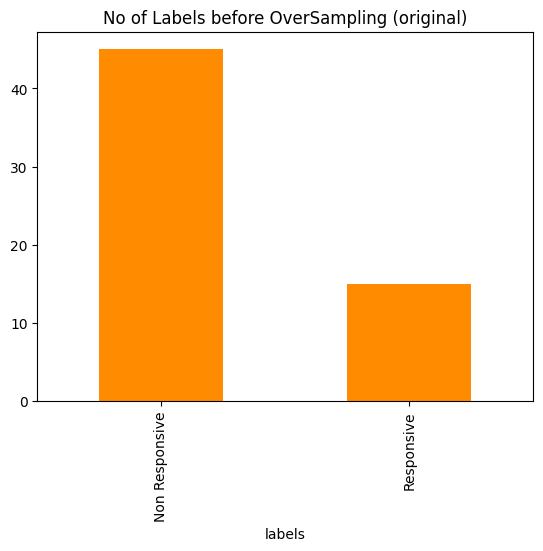

In [2169]:
label = pd.DataFrame()
label['labels'] = labels #.value_counts().plot(kind ='bar')
label['labels'].astype(str).replace('1',"Responsive").replace('0','Non Responsive').value_counts().plot(kind='bar', color='darkorange', title="No of Labels before OverSampling (original)")

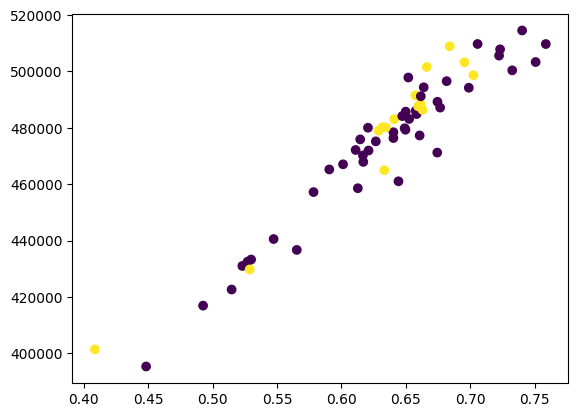

In [2181]:
import matplotlib.pyplot as plt 
plt.scatter(cpg_sites.mean(axis=1), cpg_sites.median(axis=1), c=la)

/home/sbl/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


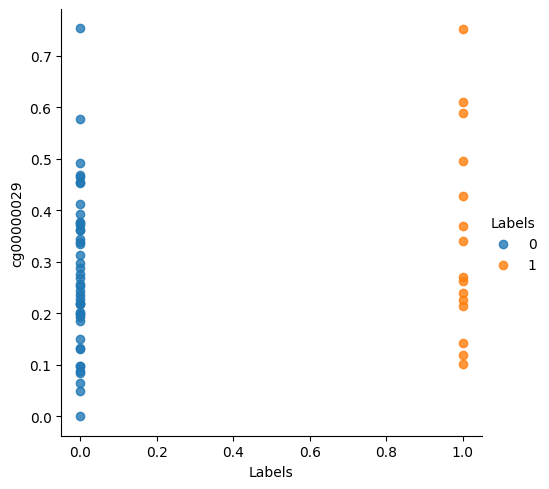

In [2196]:
import seaborn as sns
sns.lmplot(x= 'Labels', y= 'cg00000029',data= train, hue='Labels', fit_reg=False)
fig = plt.gcf()
# set_size_inches(15, 10)
plt.show()

In [1520]:
Model = "SGD Classifier"
Feature = "CV + ENET"
def print_metrics(x, y):
    print(f" --------  {Model} {Feature} Accuracy:", accuracy_score(x, y))
    print(f"\n{Model} {Feature} Confusion Matrix:\n", confusion_matrix(x, y))
    print(f"\n{Model} {Feature} Classification Report:\n", classification_report(x, y))


# # Linear Regression 
# linear_model = LinearRegression()
# linear_model.fit(X_train_standardized, y_train)
# y_pred = linear_model.predict(X_test_standardized)
# classification_report(y_pred, y_test)
# # Output of LINEAR REGRESSION :: Can not map binary values with floats


#                                                             
#                               -------------------------------- LOGISTIC REGRESSION ANALYSIS

# model = LogisticRegression(penalty = 'elasticnet', solver = 'saga', l1_ratio = 0.1)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                             
#                                             ------------------ Random Forest Analysis 

# model = RandomForestClassifier(n_estimators = 100, random_state = 220)
# model = RandomForestClassifier(n_estimators=150 ,max_features= 5 , random_state=20)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#  For loop using GRID CV (for cross validation)
# param_grid = {
    # 'n_estimators': [50, 100, 200],
    # 'max_depth': [None, 10, 20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'n_jobs' : [-1]
# }
# from sklearn.model_selection import GridSearchCV
# rf_classifier = RandomForestClassifier()
# 
# grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_train, y_train)
# 
# print("Best Parameters:", grid_search.best_params_)
# print("Best Accuracy:", grid_search.best_score_)
# 
#  For Loop in Models
# param_grid = {
    # 'n_estimators': [i for i in range(1,50,5)],
    # 'max_depth': [None, 10],
    # 'min_samples_split': [2, 5],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': [ 'sqrt', 'log2'],
    # 'n_jobs' : [-1],
# }
# best_accuracy = 0.0
# best_params = None
# import itertools
# for params in itertools.product(*param_grid.values()):
    # param_dict = dict(zip(param_grid.keys(), params))
# 
    # rf_classifier = RandomForestClassifier(random_state=42, **param_dict)
    # rf_classifier.fit(X_train, y_train)
# 
    # y_val_pred = rf_classifier.predict(melanoma_test_standarized)
    # val_accuracy = accuracy_score(melanoma_y, y_val_pred)
# 
    # if val_accuracy > best_accuracy:
        # best_accuracy = val_accuracy
        # best_params = param_dict
# 

#                                                             
#                                         -------------------------- SGD Classifier

# model = SGDClassifier(max_iter=500, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)


#                                                             
#                                                --------------------- SVM Classifier 

# model = LinearSVC(dual="auto", random_state=0, tol=1e-3)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                               ------------------------- Gradient Boost

# params = {'n_estimators':2, 'max_depth':1, 'learning_rate': 0.4}
# model = GradientBoostingClassifier(**params)
# model.fit(X_train_standardized, y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)

#                                                               ------------------- HistGradientBoostingClassifier

# model = HistGradientBoostingClassifier(min_samples_leaf= 1 ,max_depth=2, learning_rate=0.5,max_iter=200)
# model.fit(X_train_standardized,y_train)
# y_pred = model.predict(X_test_standardized)
# print_metrics(y_pred,y_test)
# y_pred = model.predict(lancent_test_standarized)
# print_metrics(y_pred,lancent_y)
# y_pred = model.predict(melanoma_test_standarized)
# print_metrics(y_pred,melanoma_y)



# # model = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=0)
# model.fit(X_train_standardized,y_train)
# print("Test :", model.score(X_test_standardized,y_test))
# print("Lancent :", model.score(lancent_test_standarized,lancent_y))
# print("Melanoma :", model.score(melanoma_test_standarized,melanoma_y))
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'splitter': ['best', 'random'],
#     'max_depth': [None,1,2,3,4,5, 10],
#     'min_samples_split': [2, 3, 4, 5, 10],
#     'min_samples_leaf': [1, 2, 4,5],
#     'max_features': [None, 'sqrt', 'log2']
# }

,cg20941745,cg11575131,cg01229787,cg20029669,cg10363003,cg13606420,cg22134634,cg18493677,cg24083367,cg22074576,...,cg16429735,cg17773637,cg24016627,cg11309112,cg24145481,cg17956443,cg23288725,cg25846864,cg01327313,cg05329576
0,0.780868,0.469294,0.635856,0.811198,-0.024755,4.689193,-0.543691,1.036917,3.485788,0.054967,...,-0.962014,0.544353,0.158179,0.022410,0.366729,0.456338,1.201027,-2.212670,0.197558,-0.357045
1,0.335933,1.780301,1.287080,-0.179507,-0.747773,0.167730,0.204768,1.028305,2.193005,-0.798825,...,1.094258,1.176522,-0.168442,-0.201650,1.544387,0.648869,1.240905,0.320675,-0.019328,-0.276183
2,0.677504,1.185740,0.226599,0.148077,-0.279278,-0.329107,0.865019,0.591379,1.116660,-0.306906,...,-0.027010,-0.083404,-0.229269,0.836217,0.490400,0.335833,0.780244,0.982946,0.225118,0.020902
3,-0.522022,-1.387540,1.141564,-0.860836,0.651938,-0.867817,-1.054429,0.666018,-0.930475,-0.890086,...,-0.901296,0.228058,-0.100805,-1.197182,0.666047,0.575147,1.156405,0.358052,0.218179,-0.392412
4,0.030379,1.156289,0.180130,-0.148074,2.007100,0.469516,1.024705,0.224214,2.059828,-0.835504,...,1.441614,-0.216614,-0.064767,-0.113365,0.623185,0.688637,0.517251,0.712552,-0.460893,-0.856107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,-2.087876,0.735790,0.737643,1.025053,0.253717,1.526867,-0.250301,0.466442,0.978328,0.721022,...,0.451027,0.032645,-0.144130,-0.721000,-0.094146,0.518878,-0.591792,-0.714019,-1.936203,-0.579798
86,-0.487292,1.302481,1.364562,0.675667,0.980441,1.267139,-0.445336,0.797090,0.961974,0.427999,...,0.499667,0.496132,-0.112267,-0.080733,1.012053,0.375857,0.676184,0.181325,-0.320996,0.481265
87,-1.188083,0.812195,1.309263,2.873465,0.471076,0.952921,0.078194,0.700741,1.046980,1.194344,...,-0.213552,0.328981,-0.143044,-0.071150,-0.210137,0.842936,-0.393622,0.215271,-1.185571,0.018176
88,0.112609,0.183431,0.300688,0.242444,0.566381,0.927712,-0.651305,0.381057,1.178076,0.978378,...,-1.145917,0.237814,-0.171871,-0.910843,-0.381000,0.452552,0.414618,-0.716805,0.329390,-0.697732
